In [110]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import math
import matplotlib.lines as mlines
import argparse

# Q2
Read `LineDetection.jpg` (the image below)




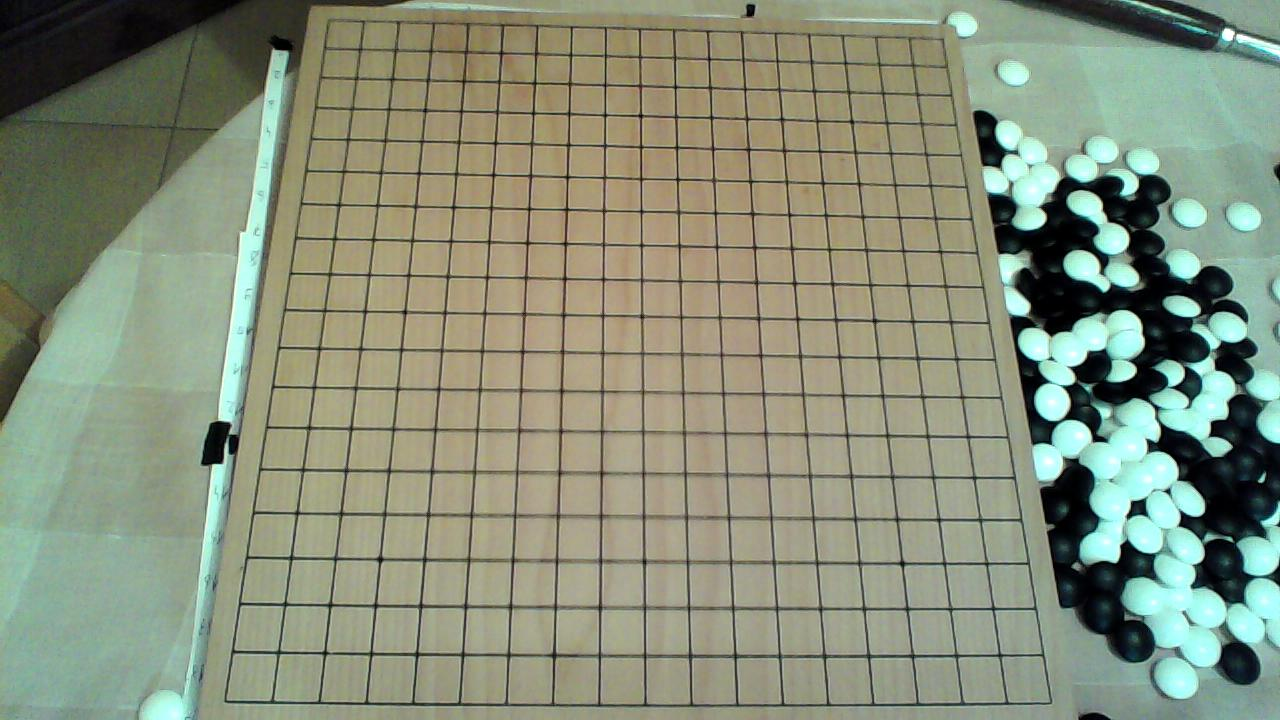

Use Hough to detect lines.

Note that you should consider the `Threshold`!

Here the threshold is `250`


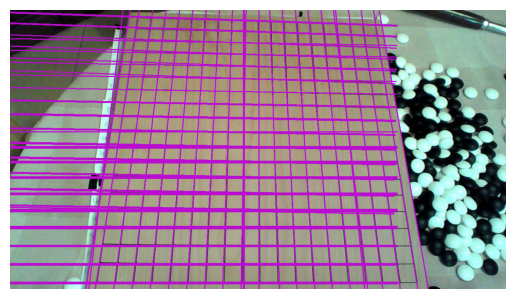

True

In [4]:
#TODO
path = r'E:\University\Term7\FCV\Homeworks\HW6\Images'
img = cv2.imread(os.path.join(path,"LineDetection.jpg"))
canny_img = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 50, 150)
lines = cv2.HoughLines(canny_img, 1, np.pi/180, 250)
for line in lines:
    p, t = line[0]
    x1 = int(p * np.cos(t) + 1000*(-np.sin(t)))
    y1 = int(p * np.sin(t) + 1000*(np.cos(t)))
    x2 = int(p * np.cos(t) - 1000*(-np.sin(t)))
    y2 = int(p * np.sin(t) - 1000*(np.cos(t)))
    cv2.line(img,(x1,y1),(x2,y2),(209,12,187),2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
cv2.imwrite(os.path.join(path,'Hough_result.jpg'),img)

Here is a sample output:

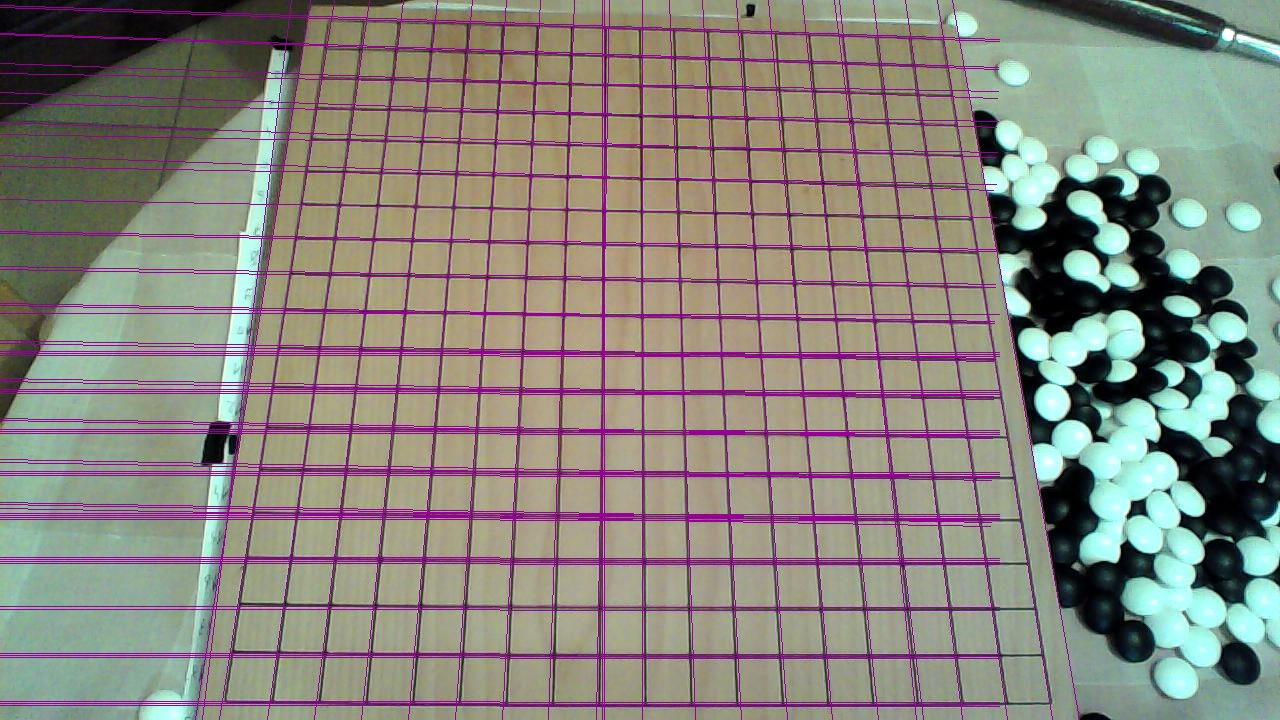

Now use *Probabilistic Hough Transform*. then, apply it to this picture.

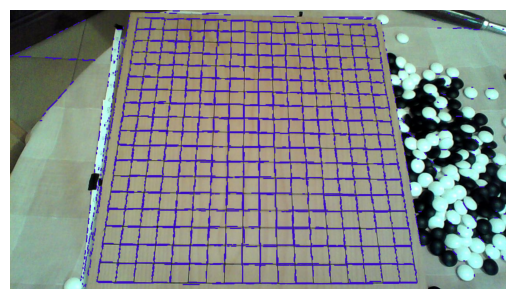

In [122]:
#TODO
img = cv2.imread(os.path.join(path,"LineDetection.jpg"))
canny_img = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 50, 150)
lines = cv2.HoughLinesP(canny_img,1,np.pi/180,90, 15, 3)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(197,10,55),2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Here is a sample output (Not the best one): 

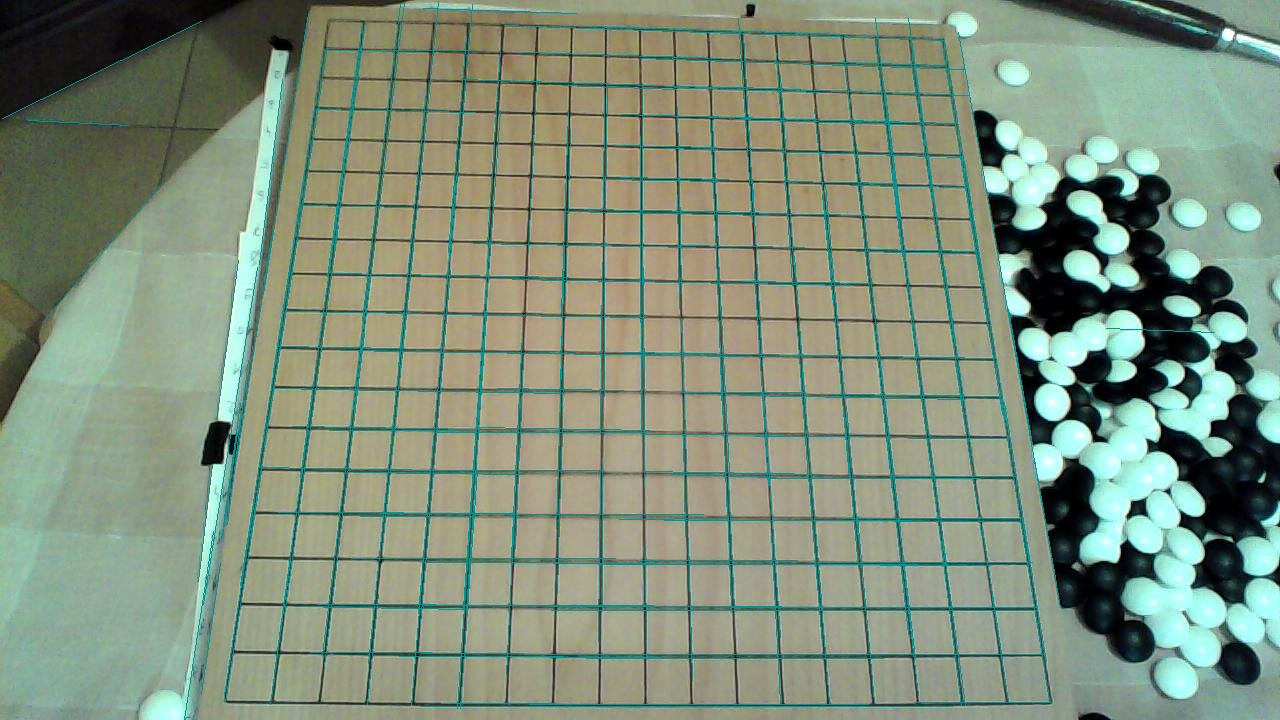

Note that you should find the optimum amount of parameters which are used in this algorithm.

Now use *Hough Transform Implementation*. then, apply it to this picture.

In [144]:
def Hough_algorithm(img):
  w = img.shape[0]
  h = img.shape[1]
  thetas = np.arange(0, 180, 1)
  cos = np.cos(np.deg2rad(thetas))
  sin = np.sin(np.deg2rad(thetas))
  rhos = round(math.sqrt(w**2 + h**2))
  H = np.zeros((2 * rhos, len(thetas)), dtype=np.uint8)
  edges = np.where(img == 255)
  xys = list(zip(edges[0], edges[1]))
  for p in range(len(xys)):
    for t in range(len(thetas)):
      rho = int(round(xys[p][1] * cos[t] + xys[p][0] * sin[t]))
      H[rho, t] += 1 
  return H


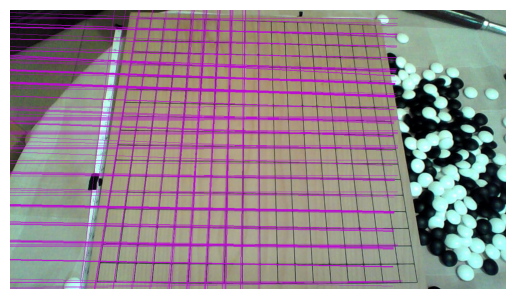

In [148]:
path = r'E:\University\Term7\FCV\Homeworks\HW6\Images'
image = cv2.imread(os.path.join(path,"LineDetection.jpg"))
edges = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),50,150)
H = Hough_algorithm(edges)
edges = np.where(H > 200)
xys = list(zip(edges[0], edges[1]))
for i in range(0, len(xys)):
    x1 = int(np.cos(np.deg2rad(xys[i][1]))*xys[i][0] + 1000*(-np.sin(np.deg2rad(xys[i][1]))))
    y1 = int(np.sin(np.deg2rad(xys[i][1]))*xys[i][0] + 1000*(np.cos(np.deg2rad(xys[i][1]))))
    x2 = int(np.cos(np.deg2rad(xys[i][1]))*xys[i][0] - 1000*(-np.sin(np.deg2rad(xys[i][1]))))
    y2 = int(np.sin(np.deg2rad(xys[i][1]))*xys[i][0] - 1000*(np.cos(np.deg2rad(xys[i][1]))))
    cv2.line(image,(x1,y1),(x2,y2),(209,12,187),1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Q3

What does this cell of code do? Explain the algorithm.

Then Compare it with the results of the previous part.

In [48]:
img = cv2.imread(os.path.join(path,"LineDetection.jpg"),0)
imgcolorous = cv2.imread(os.path.join(path,"LineDetection.jpg"))
UNKNOWN = cv2.createLineSegmentDetector(0)
lines = UNKNOWN.detect(img)[0]
drawn_img = UNKNOWN.drawSegments(imgcolorous,lines)
cv2.imwrite(os.path.join(path,'UNKNOWN.jpg'),drawn_img)

True

# Q4

In the cells below you should define two functions that one of them covert RGB to CMYK and another one Convert them vice versa. 

In [93]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  #TODO
  r = r / RGB_SCALE
  g = g / RGB_SCALE
  b = b / RGB_SCALE 
  k = 1 - np.max([r, g, b])
  c = int((1 - k - r) * CMYK_SCALE / (1 - k))
  m = int((1 - k - g) * CMYK_SCALE / (1 - k))
  y = int((1 - k - b) * CMYK_SCALE / (1 - k))
  return c, m, y, int(k * 100)

In [94]:
rgb_to_cmyk(25, 56, 25)

(55, 0, 55, 78)

Expected Output: (55, 0, 55, 78)

In [99]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):

  #TODO
  r = int(((1 - (c / CMYK_SCALE)) * (1 - (k / 100)) * RGB_SCALE))
  g = int(((1 - (m / CMYK_SCALE)) * (1 - (k / 100)) * RGB_SCALE))
  b = int(((1 - (y / CMYK_SCALE)) * (1 - (k / 100)) * RGB_SCALE))
  return r, g, b

In [100]:
cmyk_to_rgb(55, 0, 55, 78)

(25, 56, 25)

Expected Output: (25, 56, 25)

# Q5
Compute the HSI parametes and V, L and Y according to lectures.

In [121]:
def convert(R, G, B):
  theta = (np.arccos(((R-G) + (R-B))/(2 * math.sqrt(pow(R-G, 2)+((R-B)*(G-B))))) * 180) / np.pi
  if B <= G:
    H = theta
  else:
    H = 360 - theta
  S = 1 - (3 * ((np.min([R, G, B]))/(R+G+B))) 
  I = ((R+G+B) / 3) / 255
  V = np.max([R, G, B]) / 255
  L = ((np.max([R, G, B]) + np.min([R, G, B]))/(2)) / 255
  Y = (0.299 * R) + (0.587 * G) + (0.114 * B)
  print ("H is: ", H)
  print ("S is: ", S)
  print ("I is: ", I)
  print ("V is: ", V)
  print ("L is: ", L)
  print ("Y is: ", Y)

In [122]:
convert(25, 56, 25)

H is:  120.00000000000001
S is:  0.2924528301886793
I is:  0.13856209150326798
V is:  0.2196078431372549
L is:  0.1588235294117647
Y is:  43.197


# Good Luck!